In [11]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [12]:
import pandas as pd

# Replace 'your_dataset.csv' with the path to your dataset file
dataset = pd.read_csv("D:\BML\winequality-red.csv")

# Display the first few rows of the dataset
print(dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [13]:
# Display basic information about the dataset
print("Dataset Info:")
print(dataset.info())

# Display descriptive statistics of the dataset
print("\nDataset Description:")
print(dataset.describe())

# Display the size of the dataset
print("\nDataset Size:")
print(dataset.size)

# Display the shape of the dataset
print("\nDataset Shape:")
print(dataset.shape)

# Display the count of unique values in each column
print("\nValue Counts for Each Column:")
for column in dataset.columns:
    print(f"\n{column} value counts:")
    print(dataset[column].value_counts())

# Check for null values in the dataset
print("\nNull Values in Dataset:")
print(dataset.isnull().sum())

# Check for NA values in the dataset
print("\nNA Values in Dataset:")
print(dataset.isna().sum())

# Check for duplicated rows in the dataset
print("\nDuplicated Rows in Dataset:")
print(dataset.duplicated().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Dataset Description:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.

In [14]:
# List of columns to keep
columns_to_keep = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Drop unnecessary columns
dataset = dataset[columns_to_keep]

# Display the first few rows of the updated dataset
print(dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [15]:
# Function to downcast numerical columns
def downcast(df):
    # Downcast floats
    float_cols = df.select_dtypes(include=['float64']).columns
    df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float')
    
    # Downcast integers
    int_cols = df.select_dtypes(include=['int64']).columns
    df[int_cols] = df[int_cols].apply(pd.to_numeric, downcast='integer')
    
    return df

# Apply downcasting to the dataset
dataset = downcast(dataset)

# Display memory usage after optimization
print("Memory usage after optimization:")
print(dataset.info(memory_usage='deep'))

Memory usage after optimization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float32
 1   volatile acidity      1599 non-null   float32
 2   citric acid           1599 non-null   float32
 3   residual sugar        1599 non-null   float32
 4   chlorides             1599 non-null   float32
 5   free sulfur dioxide   1599 non-null   float32
 6   total sulfur dioxide  1599 non-null   float32
 7   density               1599 non-null   float32
 8   pH                    1599 non-null   float32
 9   sulphates             1599 non-null   float32
 10  alcohol               1599 non-null   float32
 11  quality               1599 non-null   int8   
dtypes: float32(11), int8(1)
memory usage: 70.4 KB
None


In [16]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers from the dataset
dataset = remove_outliers(dataset)

# Display the shape of the dataset after removing outliers
print("Dataset shape after removing outliers:")
print(dataset.shape)

Dataset shape after removing outliers:
(1181, 12)


In [17]:
# Separate features by categorical and numerical
categorical_features = dataset.select_dtypes(include=['int8']).columns.tolist()
numerical_features = dataset.select_dtypes(include=['float32']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['quality']
Numerical Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical features
for feature in categorical_features:
    dataset[feature] = label_encoder.fit_transform(dataset[feature])

# Display the first few rows of the encoded dataset
print(dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        1  
1      9.8        1  
2      9.8        1 

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to numerical features
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

# Display the first few rows of the scaled dataset
print(dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.521759          1.078088    -1.375475       -0.647853  -0.184461   
1      -0.247283          2.175405    -1.375475        0.941406   1.343322   
2      -0.247283          1.443861    -1.152346        0.260295   0.926654   
3       2.085757         -1.482317     1.748333       -0.647853  -0.253905   
4      -0.521759          1.078088    -1.375475       -0.647853  -0.184461   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.457000             -0.315507  0.765323  1.407666  -0.614634   
1             1.135085              0.949149  0.137578 -0.946761   0.420001   
2            -0.002118              0.450951  0.263112 -0.491066   0.161342   
3             0.225322              0.680889  0.890895 -1.250558  -0.442195   
4            -0.457000             -0.315507  0.765323  1.407666  -0.614634   

    alcohol  quality  
0 -0.988452        1  
1 -0.57327

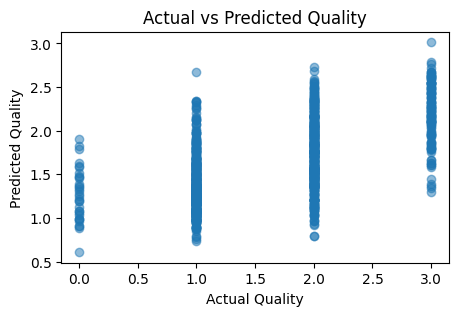

In [20]:
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

# Separate the features and target variable
X = dataset[numerical_features]
y = dataset['quality']

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Plot the actual vs predicted values
plt.figure(figsize=(5, 3))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.68       513
           1       0.57      0.41      0.48       499
           2       0.69      0.35      0.47       136

   micro avg       0.64      0.52      0.57      1148
   macro avg       0.65      0.47      0.54      1148
weighted avg       0.64      0.52      0.56      1148
 samples avg       0.47      0.50      0.48      1148

Confusion Matrix:
[[498  48   0]
 [295 204   0]
 [ 34 102   0]]


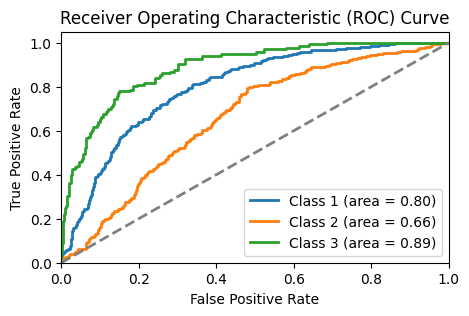

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Binarize the output
y_bin = label_binarize(y, classes=[1, 2, 3])

# Initialize the OneVsRestClassifier with Logistic Regression
logistic_model = OneVsRestClassifier(LogisticRegression())

# Fit the model
logistic_model.fit(X, y_bin)

# Predict the target variable
y_pred_logistic = logistic_model.predict(X)

# Print the classification report
print("Classification Report:")
print(classification_report(y_bin, y_pred_logistic))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_bin.argmax(axis=1), y_pred_logistic.argmax(axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_bin.shape[1]):
	fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], logistic_model.predict_proba(X)[:, i])
	roc_auc[i] = roc_auc_score(y_bin[:, i], logistic_model.predict_proba(X)[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 3))
for i in range(y_bin.shape[1]):
	plt.plot(fpr[i], tpr[i], lw=2, label='Class %d (area = %0.2f)' % (i + 1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.18      0.20        33
           1       0.64      0.75      0.69       513
           2       0.60      0.47      0.53       499
           3       0.49      0.62      0.55       136

    accuracy                           0.60      1181
   macro avg       0.49      0.50      0.49      1181
weighted avg       0.60      0.60      0.59      1181

Confusion Matrix:
[[  6  20   7   0]
 [ 14 383 104  12]
 [  6 184 233  76]
 [  0  10  42  84]]


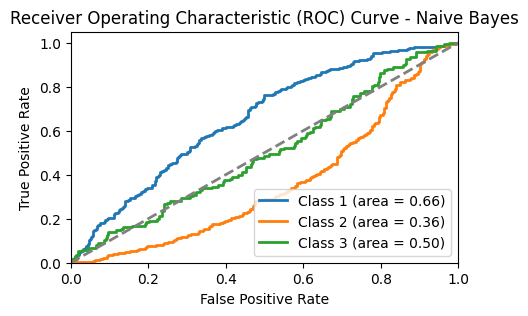

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X, y)

# Predict the target variable
y_pred_nb = nb_model.predict(X)

# Print the classification report
print("Classification Report:")
print(classification_report(y, y_pred_nb))

# Compute the confusion matrix
conf_matrix_nb = confusion_matrix(y, y_pred_nb)
print("Confusion Matrix:")
print(conf_matrix_nb)

# Compute ROC curve and ROC area for each class
fpr_nb = dict()
tpr_nb = dict()
roc_auc_nb = dict()
for i in range(y_bin.shape[1]):
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_bin[:, i], nb_model.predict_proba(X)[:, i])
    roc_auc_nb[i] = roc_auc_score(y_bin[:, i], nb_model.predict_proba(X)[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 3))
for i in range(y_bin.shape[1]):
    plt.plot(fpr_nb[i], tpr_nb[i], lw=2, label='Class %d (area = %0.2f)' % (i + 1, roc_auc_nb[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

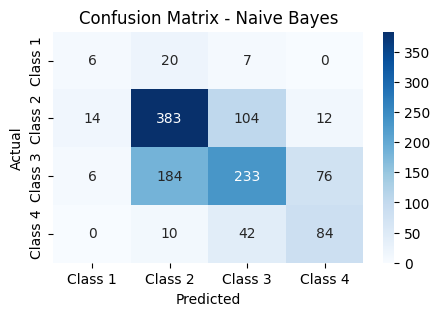

In [25]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00       513
           2       1.00      1.00      1.00       499
           3       1.00      1.00      1.00       136

    accuracy                           1.00      1181
   macro avg       1.00      1.00      1.00      1181
weighted avg       1.00      1.00      1.00      1181

Confusion Matrix:
[[ 33   0   0   0]
 [  0 513   0   0]
 [  0   0 499   0]
 [  0   0   0 136]]


<Figure size 500x300 with 0 Axes>

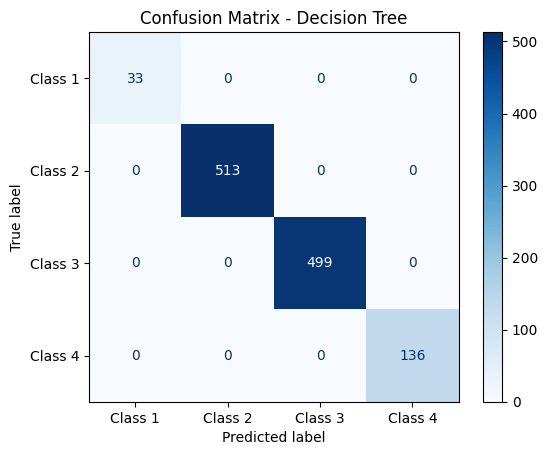

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Fit the model
dt_model.fit(X, y)

# Predict the target variable
y_pred_dt = dt_model.predict(X)

# Print the classification report
print("Classification Report:")
print(classification_report(y, y_pred_dt))

# Compute the confusion matrix
conf_matrix_dt = confusion_matrix(y, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
ConfusionMatrixDisplay(conf_matrix_dt, display_labels=['Class 1', 'Class 2', 'Class 3', 'Class 4']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.06      0.11        33
           1       0.76      0.82      0.79       513
           2       0.72      0.75      0.73       499
           3       0.71      0.51      0.60       136

    accuracy                           0.73      1181
   macro avg       0.71      0.54      0.56      1181
weighted avg       0.73      0.73      0.72      1181

Confusion Matrix:
[[  2  20  11   0]
 [  1 421  87   4]
 [  0  99 375  25]
 [  0  16  50  70]]


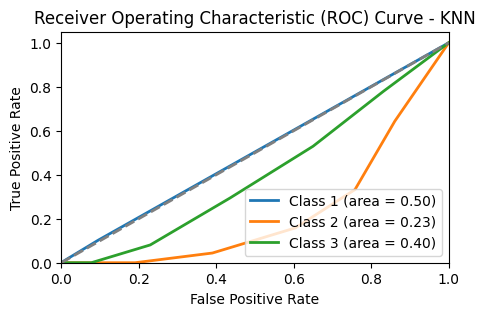

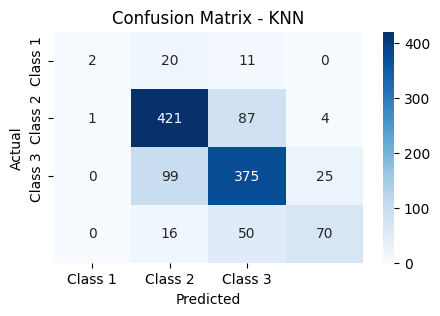

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(X, y)

# Predict the target variable
y_pred_knn = knn_model.predict(X)

# Print the classification report
print("Classification Report:")
print(classification_report(y, y_pred_knn))

# Compute the confusion matrix
conf_matrix_knn = confusion_matrix(y, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

# Compute ROC curve and ROC area for each class
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(y_bin.shape[1]):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_bin[:, i], knn_model.predict_proba(X)[:, i])
    roc_auc_knn[i] = roc_auc_score(y_bin[:, i], knn_model.predict_proba(X)[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 3))
for i in range(y_bin.shape[1]):
    plt.plot(fpr_knn[i], tpr_knn[i], lw=2, label='Class %d (area = %0.2f)' % (i + 1, roc_auc_knn[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.show()

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

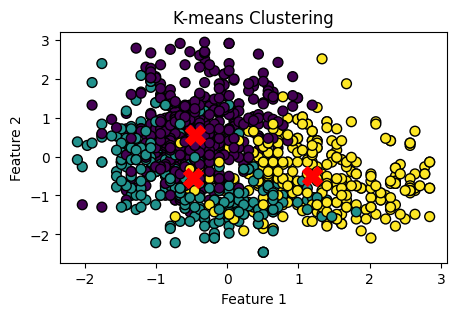

In [31]:
from sklearn.cluster import KMeans

# Initialize the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(X)

# Predict the clusters
clusters = kmeans.predict(X)

# Add the cluster labels to the dataset
dataset['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(5, 3))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()